In [1]:
# -*- coding: utf-8 -*-

'''
以 Haar 特征分类器为基础的面部检测技术
将面部检测扩展到眼部检测等。

以 Haar 特征分类器为基础的对 检测技术是一种 常有效的对 检测 技术 2001 年 Paul_Viola 和 Michael_Jones 提出 。它是基于机器学习的    使用大 的正 样本图像 练得到一个 cascade_function 最后再用它 来做对 检测。
现在我们来学习  检测。开始时 算法  大 的正样本图像   图 像 和 样本图像 不含  的图像 来 练分类器。我们  从其中提取特 征。下图中的 Haar 特征会 使用。它们就像我们的卷积核。每一个特征是一 个值  个值等于 色矩形中的像素值之后减去白色矩形中的像素值之和。

 那么我们怎样从超过160000+ 个特征中 出最好的特征呢 ？
 使用 Adaboost。

OpenCV 自带了训练器和检测器。如果你想自己训练一个分类器来检测 汽车飞机等的
可以使用 OpenCV 构建。
Cascade Classifier Training :http://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html


'''

import numpy as np
import cv2

# 运行之前，检查cascade文件路径是否在你的电脑上
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml')

# img = cv2.imread('../data/sachin.jpg')
# img = cv2.imread('../data/kongjie_hezhao.jpg')
img = cv2.imread('img/airline-stewardess-bikini.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray', gray)


# Detects objects of different sizes in the input image.
# The detected objects are returned as a list of rectangles.
# cv2.CascadeClassifier.detectMultiScale(image, scaleFactor, minNeighbors, flags, minSize, maxSize)
# scaleFactor – Parameter specifying how much the image size is reduced at each image
# scale.
# minNeighbors – Parameter specifying how many neighbors each candidate rectangle should
# have to retain it.
# minSize – Minimum possible object size. Objects smaller than that are ignored.
# maxSize – Maximum possible object size. Objects larger than that are ignored.
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)#改进
print("Detected ", len(faces), " face")

for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(10000)
cv2.destroyAllWindows()


Detected  4  face


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/23 下午4:14
# @Author  : play4fun
# @File    : Pedestrian_Detection_video.py
# @Software: PyCharm

"""
Pedestrian_Detection_video.py:检测视频里的行人

视频网站
https://v.qq.com/x/page/t0501y6jtfi.html

"""

# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import time

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, help="path to images directory")
# args = vars(ap.parse_args())

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

#
cap = cv2.VideoCapture('videos/礼让斑马线！齐齐哈尔城市文明的伤！.mp4')
# cap = cv2.VideoCapture('../../data/TownCentreXVID.mp4')

fps = cap.get(cv2.CAP_PROP_FPS)  # 25.0
print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('共有', num_frames, '帧')  # 共有 2499.0 帧

frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print('高：', frame_height, '宽：', frame_width)  # 高： 480.0 宽： 640.0
# exit(0)


# 跳过多少帧
skips = 20

# loop over the image paths
# for imagePath in paths.list_images(args["images"]):
while cap.isOpened():

    # load the image and resize it to (1) reduce detection time
    # and (2) improve detection accuracy
    # image = cv2.imread(imagePath)

    ret, frame = cap.read()
    image = frame

    #
    current = cap.get(cv2.CAP_PROP_POS_FRAMES)
    if current % skips != 0:
        continue

    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()

    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
                                            padding=(8, 8), scale=1.05)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
    # filename = imagePath[imagePath.rfind("/") + 1:]
    # print("[INFO] {}: {} original boxes, {} after suppression".format(
    print("[INFO] {} original boxes, {} after suppression".format(len(rects), len(pick)))

    # show the output images
    cv2.imshow("Before NMS", orig)
    cv2.imshow("After NMS", image)
    cv2.moveWindow("After NMS", y=0, x=400)

    cv2.waitKey(10000)
#     if key == ord("q"):
#         break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


Frames per second using video.get(cv2.CAP_PROP_FPS) : 25.0
共有 2499.0 帧
高： 480.0 宽： 640.0
[INFO] 2 original boxes, 2 after suppression
[INFO] 1 original boxes, 1 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 0 original boxes, 0 after suppression
[INFO] 1 original boxes, 1 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 3 original boxes, 2 after suppression
[INFO] 3 original boxes, 3 after suppression
[INFO] 4 original boxes, 3 after suppression
[INFO] 3 original boxes, 2 after suppression
[INFO] 3 original boxes, 3 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 4 original boxes, 3 after suppression
[INFO] 2 original boxes, 2 after suppression
[INFO] 1 original boxes, 1 after suppression
[INFO] 1 original boxes, 1 after suppression
[INFO] 1 or

# 创建自己想检测的模块
使用官方OpenCV应用程序：opencv_createsamples，opencv_annotation，opencv_traincascade和opencv_visualisation 实现


原文:
http://docs.opencv.org/3.2.0/dc/d88/tutorial_traincascade.html

## 介绍
使用弱分类器的升级级联包括两个主要阶段：培训和检测阶段。使用HAAR或LBP的模型的检测阶段在对象检测教程中进行了描述。本文档概述了培训您自己的弱分类器级联的功能。目前的指导将贯穿各个阶段：收集培训数据，准备培训数

## 准备培训资料

为了训练弱分类器的级联，我们需要一组积极的样本（包含要检测的实际对象）和一组负图像（包含您不想检测的所有内容）。必须手动准备一组负样本，而使用opencv_createsamples应用程序创建一组正样本。

## 负样本

负样本取自任意图像，不包含要检测的对象。这些生成样本的负图像应该列在一个特殊的负图像文件中，每个行包含一个图像路径（可以是绝对的或相对的）。请注意，负样本和样本图像也称为背景样本或背景图像，并在本文档中可互换使用。

描述的图像可以具有不同的尺寸。然而，每个图像应该等于或大于所需的训练窗口大小（其对应于模型尺寸，大多数时间是对象的平均大小），因为这些图像用于将给定的负图像分割成多个图像具有此训练窗口大小的样本。

这样一个负面描述文件的例子：

目录结构：

/ IMG
  img1.jpg
  img2.jpg
bg.txt
文件bg.txt：

IMG / img1.jpg
IMG / img2.jpg
您将会使用一组负窗口样本来告诉机器学习步骤，在尝试找到感兴趣的对象时，在这种情况下，提升无法寻找的内容。

## 阳性样品

正样本由opencv_createsamples应用程序创建。它们被推动过程用于定义当试图找到您感兴趣的对象时实际寻找的模型。该应用程序支持生成正样本数据集的两种方式。

您可以从单个正面对象图像生成一堆积极的。
您可以自己提供所有的积极因素，只能使用该工具剪切出来，调整大小并将它们放在opencv所需的二进制格式中。
虽然第一种方法对固定对象工作正常，如非常刚性的标志，但是对于较少刚性的对象，它往往会失败。在这种情况下，我们建议使用第二种方法。通过使用opencv_createsamples应用程序，网络上的许多教程甚至可以指示100个真实对象图像，可以导致比1000个人为生成的正面更好的模型。如果你决定采取第一种方法，请记住一些事情：

请注意，在将其提交给上述应用程序之前，您需要使用多个单一的积极样本，因为它仅适用于透视变换。
如果您想要一个健壮的模型，请采集涵盖范围广泛的可能在对象类中发生的变体的样本。例如，在面孔的情况下，您应该考虑不同的种族和年龄组，情绪和胡须风格。这也适用于使用第二种方法时。
第一种方法采用单个对象图像，例如公司徽标，并通过随机旋转对象，改变图像强度以及将图像放置在任意背景上，从给定对象图像创建大量正样本。随机性的数量和范围可以通过opencv_createsamples应用程序的命令行参数来控制。

命令行参数：

* -vec <vec_file_name> ：包含训练样本的输出文件的名称。
* -img <image_file_name> ：源对象图像（如公司徽标）。
* -bg <background_file_name>：背景描述文件; 包含用作对象的随机变形版本的背景的图像列表。
* -num <number_of_samples> ：生成的阳性样本数。
* -bgcolor <background_color>：背景颜色（目前为灰度图像）背景颜色表示透明颜色。由于可能会出现压缩伪影，所以可以通过-bgthresh指定颜色容差的数量。具有bgcolor-bgthresh和bgcolor + bgthresh范围的所有像素都被解释为透明的。
* -bgthresh <background_color_threshold>
* -inv ：如果指定，颜色将被反转。
* -randinv ：如果指定，颜色将随机反转。
* -maxidev <max_intensity_deviation> ：前景样本中像素的最大强度偏差。
* -maxxangle <max_x_rotation_angle> ：朝向x轴的最大旋转角度必须以弧度表示。
* -maxyangle <max_y_rotation_angle> ：向y轴的最大旋转角度必须以弧度表示。
* -maxzangle <max_z_rotation_angle> ：朝向z轴的最大旋转角度必须以弧度表示。
* -show：有用的调试选项。如果指定，将显示每个样品。按Esc将继续样品创建过程，而不显示每个样品。
* -w <sample_width> ：输出样本的宽度（以像素为单位）。
* -h <sample_height> ：输出样本的高度（以像素为单位）。
以这种方式运行opencv_createsamples时，使用以下过程创建一个示例对象实例：给定的源图像围绕所有三个轴随机旋转。所选择的角由限制-maxxangle，-maxyangle和-maxzangle。那么具有来自[bg_color-bg_color_threshold; bg_color + bg_c​​olor_threshold]范围被解释为透明。将白噪声添加到前景的强度。如果-inv指定了键，则前景像素强度被反转。如果-randinv指定了密钥，则算法随机选择是否应该对该样本应用反演。最后，所获得的图像被放置在从背景描述文件的任意的背景下，调整为所指定的所需的大小-w和-h和存储到VEC文件，-vec

也可以从先前标记的图像的集合获得正样本，这是构建鲁棒对象模型时的期望方式。该集合由与背景描述文件类似的文本文件描述。该文件的每行对应一个图像。该行的第一个元素是文件名，后跟对象注释的数量，后跟数字描述边界矩形（x，y，width，height）的对象的坐标。

描述文件的一个例子：

目录结构：

/ IMG
  img1.jpg
  img2.jpg
info.dat
文件info.dat：

img / img1.jpg 1 140 100 45 45
img / img2.jpg 2 100 200 50 50 50 30 25 25

图像img1.jpg包含具有以下边界矩形坐标的单个对象实例：（140，100，45，45）。图像img2.jpg包含两个对象实例。

为了从这样的收集中创建积极的样本，-info应该指定参数，而不是-img：

* -info <collection_file_name> ：标记图像集合的描述文件。
请注意，在这种情况下，这些参数-bg, -bgcolor, -bgthreshold, -inv, -randinv, -maxxangle, -maxyangle, -maxzangle被简单地忽略，不再使用。在这种情况下，样本创建的方案如下。通过从原始图像中切出提供的边界框，从给定图像中取出对象实例。然后它们被调整到目标样本大小（通过定义-w和-h），并存储在输出VEC-文件，由定义的-vec参数。无失真应用，所以只能影响参数是-w，-h，-show和-num。

创建-info文件的手动过程也可以使用opencv_annotation工具完成。这是一个开源工具，用于在任何给定的图像中可视化地选择对象实例的感兴趣区域。以下小节将详细讨论如何使用此应用程序。

## 额外的言论

opencv_createsamples实用程序可用于检查存储在任何给定的正样本文件中的样本。为了做到这一点只-vec，-w并-h应指定的参数。
vec文件的示例可在此处使用opencv/data/vec_files/trainingfaces_24-24.vec。它可以用于训练具有以下窗口大小的面部检测器：-w 24 -h 24。
## 使用OpenCV的集成注释工具

由于OpenCV 3.x社区一直在提供和维护用于生成-info文件的开放源代码注释工具。如果OpenCV应用程序在其中构建，该工具可以通过命令opencv_annotation访问。

使用该工具非常简单。该工具接受几个必需的和一些可选的参数：

* --annotations （必需）：注释txt文件的路径，您要存储注释的位置，然后传递给-info参数[example - /data/annotations.txt]
* --images （必需）：包含与对象的图像的文件夹的路径[example - / data / testimages /]
* --maxWindowHeight （可选）：如果输入图像的高度较大，则在此给定分辨率，请调整图像的大小，以便更容易的注释，使用--resizeFactor。
* --resizeFactor （可选）：使用--maxWindowHeight参数时用于调整输入图像大小的因子。
请注意，可选参数只能一起使用。下面可以看到可以使用的命令的例子

opencv_annotation --annotations = / path / to / annotations / file.txt --images = / path / to / image / folder /
此命令将启动一个包含将用于注释的第一个图像和鼠标光标的窗口。有关如何使用注释工具的视频，请点击此处。基本上有几个触发动作的按键。鼠标左键用于选择对象的第一个角，然后继续绘制，直到您正常，并且注册了第二个鼠标左键单击时停止。每次选择后，您都有以下选择：

按c：确认注释，​​将注释转为绿色并确认其存储
按d：从注释列表中删除最后一个注释（易于删除错误的注释）
按n：继续下一张图片
按ESC：这将退出注释软件
最后你会得到一个可以传递给-infoopencv_createsamples参数的可用注释文件。

## 级联训练

下一步是基于预先准备的正数和负数据集，对弱分类器的升压级联进行实际训练。

opencv_traincascade应用程序的命令行参数按目的分组：

共同论点：
* -data <cascade_dir_name>：训练有素的分类器应存放在哪里。预先手动创建该文件夹。
* -vec <vec_file_name> ：带有正样本的vec文件（由opencv_createsamples实用程序创建）。
* -bg <background_file_name>：背景描述文件。这是包含负样本图像的文件。
* -numPos <number_of_positive_samples> ：每个分类阶段培训使用的阳性样本数。
* -numNeg <number_of_negative_samples> ：每个分类阶段训练中使用的负样本数。
* -numStages <number_of_stages> ：要训练的级联级数。
* -precalcValBufSize <precalculated_vals_buffer_size_in_Mb>：预先计算的特征值的缓冲区大小（以Mb为单位）。您指定的快训练过程中更多的内存，但是请记住，-precalcValBufSize并-precalcIdxBufSize结合不应超过您可用的系统内存。
* -precalcIdxBufSize <precalculated_idxs_buffer_size_in_Mb>：用于预先计算的特征索引（Mb）的缓冲区大小。您指定的快训练过程中更多的内存，但是请记住，-precalcValBufSize并-precalcIdxBufSize结合不应超过您可用的系统内存。
* -baseFormatSave：这个说法在哈尔式的特征的情况下是实际的。如果指定，级联将以旧格式保存。这仅适用于向后兼容性原因，并允许用户坚持使用旧的已弃用的界面，至少使用较新界面对模型进行训练。
* -numThreads <max_number_of_threads>：训练期间使用的最大线程数。请注意，根据您的机器和编译选项，实际使用的线程数可能会较低。默认情况下，如果您使用TBB支持构建OpenCV（此优化所需），则可以选择最大可用线程。
* -acceptanceRatioBreakValue <break_value>：此参数用于确定您的模型应该如何精确地保持学习和何时停止。一个好的指导方针是训练不超过10e-5，以确保该模型不会超出您的训练数据。默认情况下，该值设置为-1以禁用此功能。
级联参数：
* -stageType <BOOST(default)>：阶段类型 目前仅支持升级分类器作为舞台类型。
* -featureType<{HAAR(default), LBP}> ：特征类型：HAAR - 类似Haar的功能，LBP - 本地二进制模式。
* -w <sampleWidth>：训练样本的宽度（以像素为单位）。必须具有与训练样本创建期间使用的完全相同的值（opencv_createsamples实用程序）。
* -h <sampleHeight>：训练样本的高度（以像素为单位）。必须具有与训练样本创建期间使用的完全相同的值（opencv_createsamples实用程序）。
提升的分类参数：
* -bt <{DAB, RAB, LB, GAB(default)}> ：提升分类器的类型：DAB - Discrete AdaBoost，RAB - Real AdaBoost，LB - LogitBoost，GAB - Gentle AdaBoost。
* -minHitRate <min_hit_rate>：分类器的每个阶段的最小期望命中率。总命中率可以估计为（min_hit_rate ^ number_of_stages），[164] §4.1。
* -maxFalseAlarmRate <max_false_alarm_rate>：分类器每个阶段的最大期望误报率。总误报率可以估计为（max_false_alarm_rate ^ number_of_stages），[164] §4.1。
* -weightTrimRate <weight_trim_rate>：指定是否使用修剪及其重量。一个体面的选择是0.95。
* -maxDepth <max_depth_of_weak_tree>：弱树的最大深度。一个体面的选择是1，就是树桩的情况。
* -maxWeakCount <max_weak_tree_count>：每个级联阶段弱树的最大数量。提升的分类器（阶段）将具有如此多的弱树（<= maxWeakCount），以实现给定的需要-maxFalseAlarmRate。
哈尔式功能参数：
* -mode <BASIC (default) | CORE | ALL>：选择训练中使用的Haar功能集的类型。BASIC仅使用直立功能，而ALL使用全套直立和45度旋转功能集。有关详细信息，请参阅[97]。
局部二进制模式参数：局部二进制模式没有参数。
opencv_traincascade应用程序完成工作后，训练好的级联将被保存在cascade.xml文件-data夹中。此文件夹中的其他文件是针对中断培训的情况而创建的，因此您可以在完成培训后将其删除。

训练完毕，你可以测试你的级联分类器！

## 可视化级联分类器

有时可以将训练出的级联可视化，查看其选择的功能以及其阶段的复杂程度。为此OpenCV提供了一个opencv_visualisation应用程序。此应用程序具有以下命令：

* --image （必需）：对象模型的引用图像的路径。这应该是一个注释，其尺寸[ -w，-h]传递给opencv_createsamples和opencv_traincascade应用程序。
* --model （必需）：训练模型的路径，它应该在提供给-dataopencv_traincascade应用程序参数的文件夹中。
* --data （可选）：如果提供了必须事先手动创建的数据文件夹，则会存储舞台输出和功能的视频。
示例命令可以在下面看到

opencv_visualisation --image = / data / object.png --model = / data / model.xml --data = / data / result /
当前可视化工具的一些限制

只处理使用opencv_traincascade工具训练的级联分类器模型，其中包含树桩作为决策树[默认设置]。
提供的图像需要是具有原始模型尺寸的示例窗口，并传递给--image参数。
HAAR / LBP面部模型的示例在Angelina Jolie的给定窗口上运行，该窗口具有与级联分类器文件相同的预处理 - > 24x24像素图像，灰度转换和直方图均衡：

为每个阶段制作一个视频，每个功能可视化：

![visualisation_video](visualisation_video.png "visualisation_video")

每个阶段都存储为一个图像，以便将来验证这些功能：

![visualisation_single_stage](visualisation_single_stage.png "visualisation_single_stage")

In [4]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/23 下午3:55
# @Author  : play4fun
# @File    : Pedestrian_Detection1.py
# @Software: PyCharm

"""
Pedestrian_Detection1.py:

网址
http://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/

运行
python Pedestrian_Detection1.py --images images
"""

# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, help="path to images directory")
# args = vars(ap.parse_args())
args = {"images":"images"}

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# loop over the image paths
for imagePath in paths.list_images(args["images"]):
    # load the image and resize it to (1) reduce detection time
    # and (2) improve detection accuracy
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()

    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
                                            padding=(8, 8), scale=1.05)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} original boxes, {} after suppression".format(
        filename, len(rects), len(pick)))

    # show the output images
    cv2.imshow("Before NMS", orig)
    cv2.moveWindow('Before NMS', x=0, y=0)
    cv2.imshow("After NMS", image)
    cv2.moveWindow('After NMS', x=orig.shape[1], y=0)
    cv2.waitKey(10000)
#     if k==ord('q'):
#         break


[INFO] images\p1.jpg: 3 original boxes, 3 after suppression
[INFO] images\p2.jpg: 3 original boxes, 3 after suppression
[INFO] images\p3.jpg: 4 original boxes, 4 after suppression
[INFO] images\p4.JPG: 6 original boxes, 5 after suppression


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/8/7 19:34
# @Author  : play4fun
# @File    : MSER_create1.py
# @Software: PyCharm

"""
MSER_create1.py:
https://stackoverflow.com/questions/40443988/python-opencv-ocr-image-segmentation
"""

import cv2

img = cv2.imread('WQbGH.jpg')
img = img[5:-5, 5:-5, :]

mser = cv2.MSER_create()

# Resize the image so that MSER can work better
img2 = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2))#扩大

gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
vis = img2.copy()

regions = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0, 255, 0))

img3 = cv2.resize(vis, (img.shape[1], img.shape[0]))
cv2.namedWindow('img', 0)
cv2.imshow('img', img3)
cv2.imwrite('mser-result.jpg', vis)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2018/2/8 16:09
# @Author  : play4fun
# @File    : Displaying a video feed with OpenCV and Tkinter.py
# @Software: PyCharm

"""
Displaying a video feed with OpenCV and Tkinter.py:
https://www.pyimagesearch.com/2016/05/30/displaying-a-video-feed-with-opencv-and-tkinter/

"""

# import the necessary packages
from __future__ import print_function
from photoboothapp import PhotoBoothApp
from imutils.video import VideoStream
import argparse
import time

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
                help="path to output directory to store snapshots")
ap.add_argument("-p", "--picamera", type=int, default=-1,
                help="whether or not the Raspberry Pi camera should be used")
args = vars(ap.parse_args())

# initialize the video stream and allow the camera sensor to warmup
print("[INFO] warming up camera...")
vs = VideoStream(usePiCamera=args["picamera"] > 0).start()
time.sleep(2.0)

# start the app
pba = PhotoBoothApp(vs, args["output"])
pba.root.mainloop()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2018/2/8 15:56
# @Author  : play4fun
# @File    : opencv-with-tkinter.py
# @Software: PyCharm

"""
opencv-with-tkinter.py:
https://www.pyimagesearch.com/2016/05/23/opencv-with-tkinter/

不需要
pip install image

"""

# import the necessary packages
from tkinter import *
from PIL import Image
from PIL import ImageTk
import tkinter.filedialog as tkFileDialog
import cv2


def select_image():
    # grab a reference to the image panels
    global panelA, panelB

    # open a file chooser dialog and allow the user to select an input
    # image
    path = tkFileDialog.askopenfilename()

    # ensure a file path was selected
    if len(path) > 0:
        # load the image from disk, convert it to grayscale, and detect
        # edges in it
        image = cv2.imread(path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edged = cv2.Canny(gray, 50, 100)

        #  represents images in BGR order; however PIL represents
        # images in RGB order, so we need to swap the channels
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # convert the images to PIL format...
        image = Image.fromarray(image)
        edged = Image.fromarray(edged)

        # ...and then to ImageTk format
        image = ImageTk.PhotoImage(image)
        edged = ImageTk.PhotoImage(edged)

        # if the panels are None, initialize them
        if panelA is None or panelB is None:
            # the first panel will store our original image
            panelA = Label(image=image)
            panelA.image = image
            panelA.pack(side="left", padx=10, pady=10)

            # while the second panel will store the edge map
            panelB = Label(image=edged)
            panelB.image = edged
            panelB.pack(side="right", padx=10, pady=10)

        # otherwise, update the image panels
        else:
            # update the pannels
            panelA.configure(image=image)
            panelB.configure(image=edged)
            panelA.image = image
            panelB.image = edged


# initialize the window toolkit along with the two image panels
root = Tk()
panelA = None
panelB = None

# create a button, then when pressed, will trigger a file chooser
# dialog and allow the user to select an input image; then add the
# button the GUI
btn = Button(root, text="Select an image", command=select_image)
btn.pack(side="bottom", fill="both", expand="yes", padx="10", pady="10")

# kick off the GUI
root.mainloop()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2018/2/8 16:10
# @Author  : play4fun
# @File    : photoboothapp.py
# @Software: PyCharm

"""
photoboothapp.py:
"""

# import the necessary packages
from __future__ import print_function
from PIL import Image
from PIL import ImageTk
import tkinter as tki
import threading
import datetime
import imutils
import cv2
import os


class PhotoBoothApp:
    def __init__(self, vs, outputPath):
        # store the video stream object and output path, then initialize
        # the most recently read frame, thread for reading frames, and
        # the thread stop event
        self.vs = vs
        self.outputPath = outputPath
        self.frame = None
        self.thread = None
        self.stopEvent = None

        # initialize the root window and image panel
        self.root = tki.Tk()
        self.panel = None

        # create a button, that when pressed, will take the current
        # frame and save it to file
        btn = tki.Button(self.root, text="Snapshot!",
                         command=self.takeSnapshot)
        btn.pack(side="bottom", fill="both", expand="yes", padx=10,
                 pady=10)

        # start a thread that constantly pools the video sensor for
        # the most recently read frame
        self.stopEvent = threading.Event()
        self.thread = threading.Thread(target=self.videoLoop, args=())
        self.thread.start()

        # set a callback to handle when the window is closed
        self.root.wm_title("PyImageSearch PhotoBooth")
        self.root.wm_protocol("WM_DELETE_WINDOW", self.onClose)

    def videoLoop(self):
        # DISCLAIMER:
        # I'm not a GUI developer, nor do I even pretend to be. This
        # try/except statement is a pretty ugly hack to get around
        # a RunTime error that  throws due to threading
        try:
            # keep looping over frames until we are instructed to stop
            while not self.stopEvent.is_set():
                # grab the frame from the video stream and resize it to
                # have a maximum width of 300 pixels
                self.frame = self.vs.read()
                self.frame = imutils.resize(self.frame, width=300)

                #  represents images in BGR order; however PIL
                # represents images in RGB order, so we need to swap
                # the channels, then convert to PIL and ImageTk format
                image = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
                image = Image.fromarray(image)
                image = ImageTk.PhotoImage(image)

                # if the panel is not None, we need to initialize it
                if self.panel is None:
                    self.panel = tki.Label(image=image)
                    self.panel.image = image
                    self.panel.pack(side="left", padx=10, pady=10)

                # otherwise, simply update the panel
                else:
                    self.panel.configure(image=image)
                    self.panel.image = image

        except RuntimeError as e:
            print("[INFO] caught a RuntimeError")

    def takeSnapshot(self):
        # grab the current timestamp and use it to construct the
        # output path
        ts = datetime.datetime.now()
        filename = "{}.jpg".format(ts.strftime("%Y-%m-%d_%H-%M-%S"))
        p = os.path.sep.join((self.outputPath, filename))

        # save the file
        cv2.imwrite(p, self.frame.copy())
        print("[INFO] saved {}".format(filename))

    def onClose(self):
        # set the stop event, cleanup the camera, and allow the rest of
        # the quit process to continue
        print("[INFO] closing...")
        self.stopEvent.set()
        self.vs.stop()
        self.root.quit()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2018/2/8 16:30
# @Author  : play4fun
# @File    : kivy_cv1.py
# @Software: PyCharm

"""
参考：https://github.com/kivy/kivy/blob/master/kivy/core/camera/camera_opencv.py

kivy_cv1.py:
https://gist.github.com/ExpandOcean/de261e66949009f44ad2

pip install kivy

问题：无显示
"""

# coding:utf-8
from kivy.app import App
from kivy.uix.image import Image
from kivy.clock import Clock
from kivy.graphics.texture import Texture
import cv2


class KivyCamera(Image):
    def __init__(self, capture, fps, **kwargs):
        super(KivyCamera, self).__init__(**kwargs)
        self.capture = capture
        Clock.schedule_interval(self.update, 1.0 / fps)

    def update(self, dt):
        ret, frame = self.capture.read()
        if ret:
            # convert it to texture
            buf1 = cv2.flip(frame, 0)
            buf = buf1.tostring()
            image_texture = Texture.create(
                size=(frame.shape[1], frame.shape[0]), colorfmt='bgr')
            image_texture.blit_buffer(buf, colorfmt='bgr', bufferfmt='ubyte')
            # display image from the texture
            self.texture = image_texture


class CamApp(App):
    def build(self):
        self.capture = cv2.VideoCapture(1)
        self.my_camera = KivyCamera(capture=self.capture, fps=30)
        return self.my_camera

    def on_stop(self):
        # without this, app will not exit even if the window is closed
        self.capture.release()


if __name__ == '__main__':
    CamApp().run()


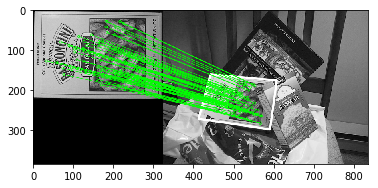

(<matplotlib.image.AxesImage at 0x53c9898>, None)

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('img/box.png',0)          # queryImage
img2 = cv2.imread('img/box_in_scene.png',0) # trainImage

# Initiate SIFT detector
#sift = cv2.SIFT()    #changed by shuaifei for cv3.4
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

In [ ]:
import cv2
help(cv2.xfeatures2d)

In [9]:
import cv2
help(cv2.FlannBasedMatcher.knnMatch)

AttributeError: 'builtin_function_or_method' object has no attribute 'knnMatch'